In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf

In [3]:
X_xor = np.random.randn(1000,2)
print(X_xor)
print(X_xor.shape)

[[ 1.72182781  0.39936018]
 [ 0.70495438 -0.02891879]
 [-0.52093535 -0.42533252]
 ...
 [ 0.5912478  -0.05435572]
 [-1.01720715  0.55897126]
 [-0.25971214 -0.357852  ]]
(1000, 2)


In [4]:
y_xor = np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
"""
	1.	X_xor[:,0] > 0:
	•	Extracts the first column of X_xor and checks if each value is greater than 0.
	•	This creates a Boolean array (True or False).
	2.	X_xor[:,1] > 0:
	•	Extracts the second column and performs the same check.
	3.	np.logical_xor(condition1, condition2):
	•	Performs an XOR (exclusive OR) operation:
	•	True if one condition is True but not both.
	•	False if both are True or both are False.
 """

'\n\t1.\tX_xor[:,0] > 0:\n\t•\tExtracts the first column of X_xor and checks if each value is greater than 0.\n\t•\tThis creates a Boolean array (True or False).\n\t2.\tX_xor[:,1] > 0:\n\t•\tExtracts the second column and performs the same check.\n\t3.\tnp.logical_xor(condition1, condition2):\n\t•\tPerforms an XOR (exclusive OR) operation:\n\t•\tTrue if one condition is True but not both.\n\t•\tFalse if both are True or both are False.\n '

In [5]:
y_xor = np.where(y_xor, 1, -1)
print(y_xor.shape)

(1000,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_xor,y_xor, test_size=0.3,random_state=1)



****No Standardization is required in DT and RF****


In [21]:
"""
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
"""

'\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nsc.fit(X_train)\nX_train = sc.transform(X_train)\nX_test = sc.transform(X_test)\n'

In [7]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train,y_train)


#

DecisionTreeClassifier(max_depth=5, random_state=42)

[Text(0.675, 0.9166666666666666, 'x[0] <= 2.105\ngini = 0.5\nsamples = 700\nvalue = [349, 351]'),
 Text(0.48333333333333334, 0.75, 'x[0] <= 0.68\ngini = 0.5\nsamples = 681\nvalue = [333, 348]'),
 Text(0.3, 0.5833333333333334, 'x[1] <= -0.018\ngini = 0.499\nsamples = 513\nvalue = [267, 246]'),
 Text(0.13333333333333333, 0.4166666666666667, 'x[0] <= -0.0\ngini = 0.417\nsamples = 253\nvalue = [178, 75]'),
 Text(0.06666666666666667, 0.25, 'gini = 0.0\nsamples = 178\nvalue = [178, 0]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 75\nvalue = [0, 75]'),
 Text(0.4666666666666667, 0.4166666666666667, 'x[0] <= -0.002\ngini = 0.45\nsamples = 260\nvalue = [89, 171]'),
 Text(0.3333333333333333, 0.25, 'x[1] <= 0.008\ngini = 0.012\nsamples = 170\nvalue = [1, 169]'),
 Text(0.26666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.08333333333333333, 'gini = 0.0\nsamples = 169\nvalue = [0, 169]'),
 Text(0.6, 0.25, 'x[1] <= 0.017\ngini = 0.043\nsamples = 90\nvalue = 

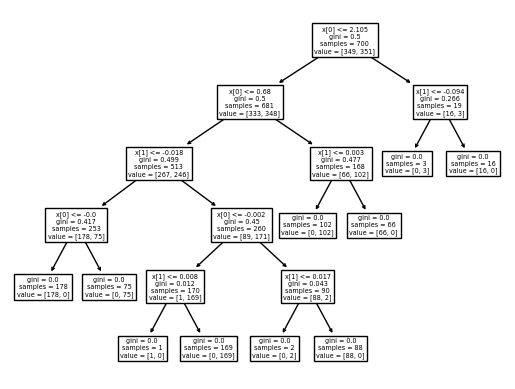

In [8]:
y_pred = tree_clf.predict(X_test)
from sklearn import tree
tree.plot_tree(tree_clf)

/Users/aryan/Desktop/AritificIAL INTELLIGENCE AND Pattern Recognition /Class Work/PlotClassification.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


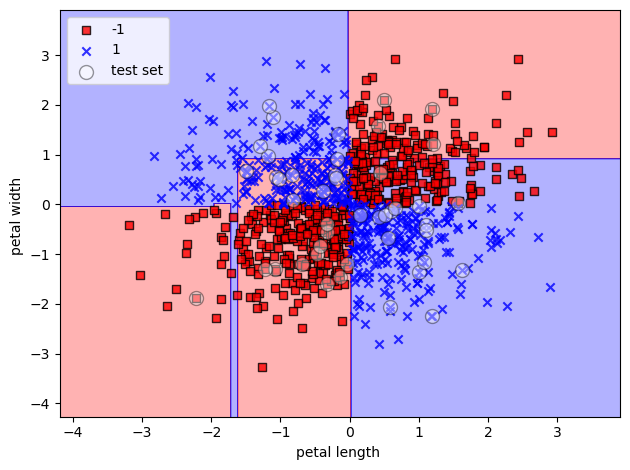

In [30]:
import matplotlib.pyplot as plt
from PlotClassification import plot_decision_regions

import numpy as np
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree_clf, test_idx=range(105, 150))
plt.xlabel('petal length ')
plt.ylabel('petal width ')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test, y_pred)
print(confmat)

[[162   0]
 [  2 136]]


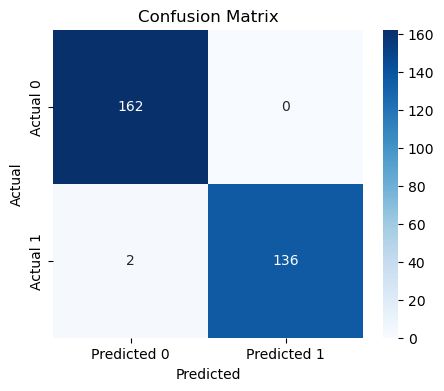

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(confmat, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

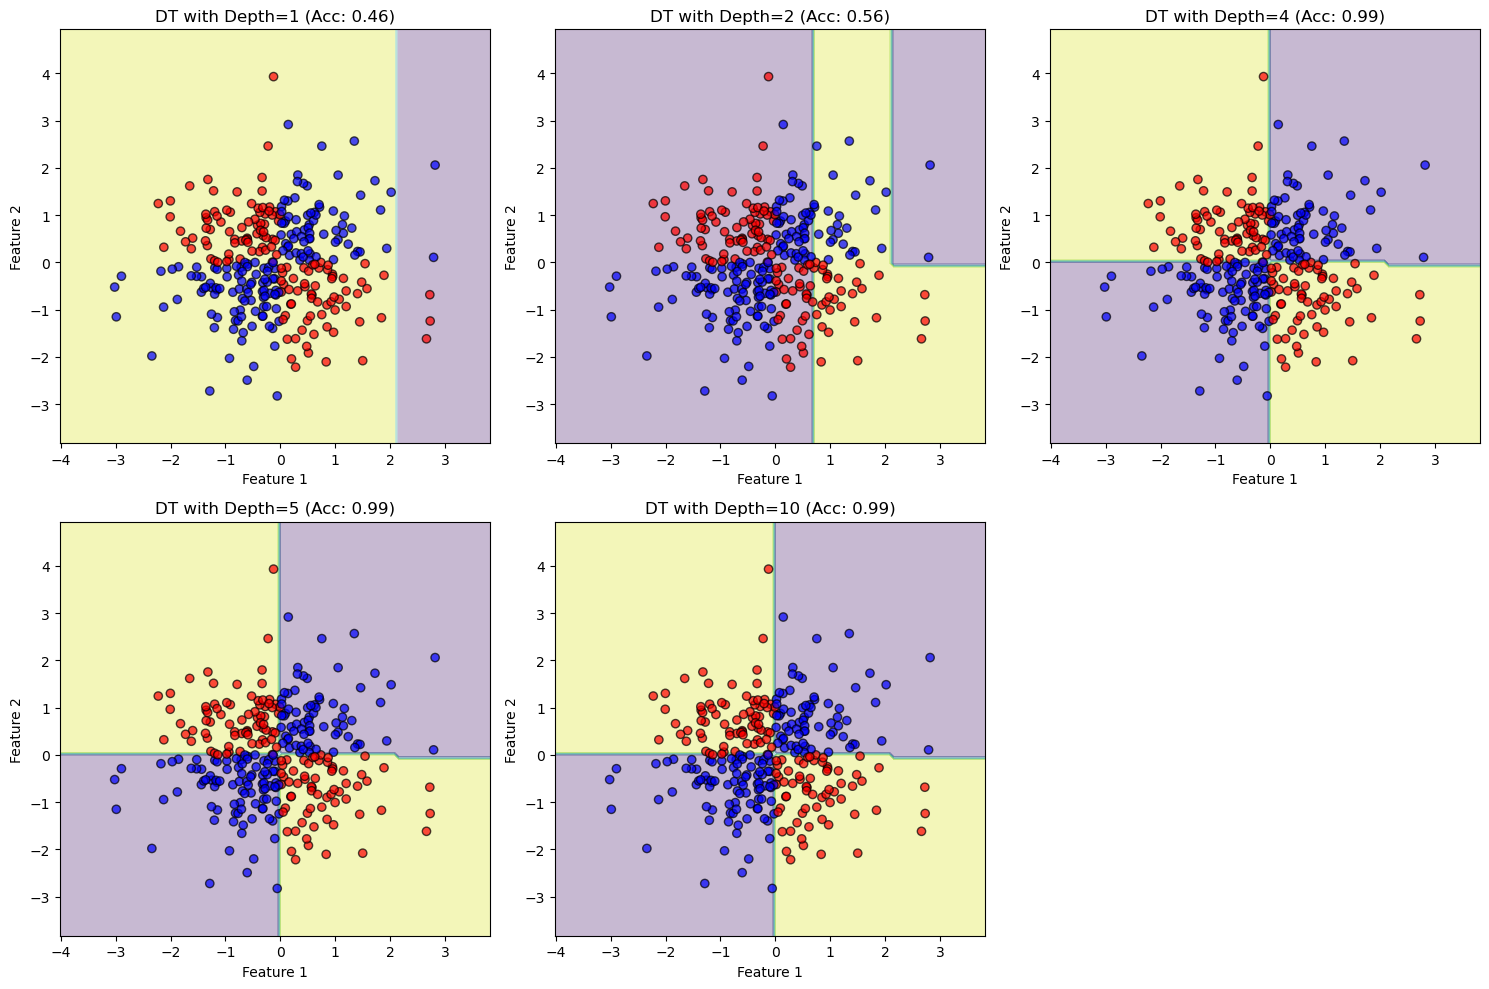

In [ ]:
# Function to plot decision boundaries
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr, alpha=0.7)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

# Train and visualize SVMs for different C values
plt.figure(figsize=(15, 10))

accuracies = []

# Different values of depth tried to test
depth = [1, 2, 4, 5, 10]
for i, C in enumerate(depth,1):
    tree_clf = DecisionTreeClassifier(max_depth=C, random_state=42)
    tree_clf.fit(X_train,y_train)


#
    y_pre = tree_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pre)
    accuracies.append((C, acc))  # to store accuracy results
    plt.subplot(2, 3, i)
    plot_decision_boundary(tree_clf, X_test, y_test, f"DT with Depth={C} (Acc: {acc:.2f})")

plt.tight_layout()
plt.show()

****Random Forest****


[[-1.66842122  0.01734457]
 [ 0.90447039  0.77621834]
 [-0.59782146 -0.01398527]
 ...
 [ 0.14741441 -0.19741515]
 [ 1.01027515  1.79548387]
 [-1.02748852  0.36286726]]
(1000, 2)
(1000,)
0.9966666666666667
[[161   0]
 [  1 138]]


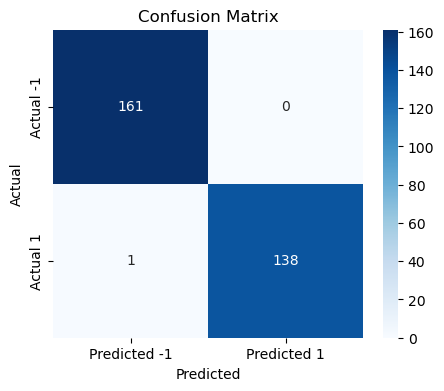

/Users/aryan/Desktop/AritificIAL INTELLIGENCE AND Pattern Recognition /Class Work/PlotClassification.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


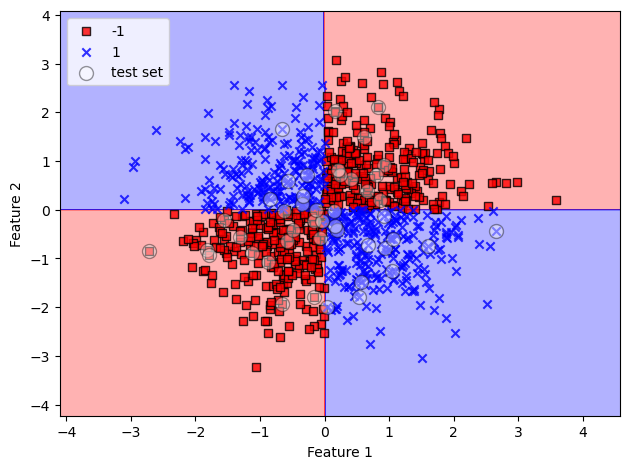

In [19]:
import numpy as np
import pandas as pd 
import tensorflow as tf
X_xor = np.random.randn(1000,2)
print(X_xor)
print(X_xor.shape)
y_xor = np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
y_xor = np.where(y_xor, 1, -1)
print(y_xor.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_xor,y_xor, test_size=0.3,random_state=1)

from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier(n_estimators=100, max_depth= 5,random_state=42)
rf_cls.fit(X_train,y_train)
y_pred = rf_cls.predict(X_test)



from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test, y_pred)
print(confmat)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
sns.heatmap(confmat, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Predicted -1", "Predicted 1"], 
            yticklabels=["Actual -1", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()  # Function to plot decision boundaries

import matplotlib.pyplot as plt
from PlotClassification import plot_decision_regions

import numpy as np
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=rf_cls, test_idx=range(105, 150))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Using the GridSearch CV to find the best Parameters for the n_estimators(number of Decision Tree in the Random forest) and the depth of each tree.**
In the below code the best parameter after the grid search have been used to plot the Confusion matrix aswell as the Decision boundary for the RF. 


Best Parameters: {'max_depth': 4, 'n_estimators': 50}
Best Accuracy: 0.9957
Test Accuracy with Best RF: 0.9967
[[161   0]
 [  1 138]]


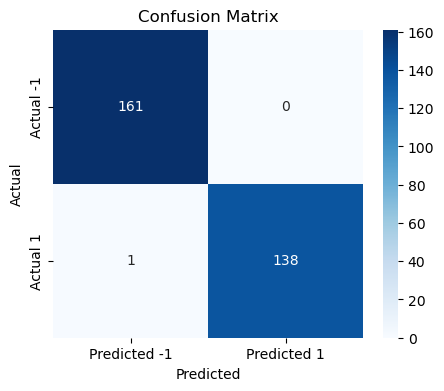

/Users/aryan/Desktop/AritificIAL INTELLIGENCE AND Pattern Recognition /Class Work/PlotClassification.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


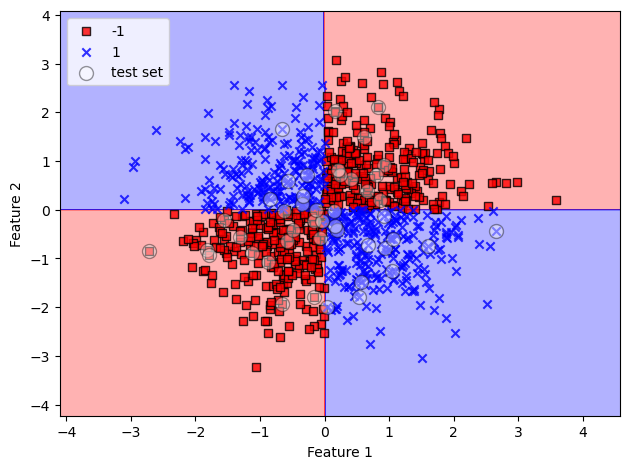

In [25]:
# Train and visualize Random Forests for different n_estimators and max_depth values
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [2, 4, 6, 8, 10, None]
}

# Perform Grid Search
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Print best parameters
print(f"Best Parameters: {rf_grid.best_params_}")
print(f"Best Accuracy: {rf_grid.best_score_:.4f}")

# Train best model
best_rf = rf_grid.best_estimator_
y_best_pred = best_rf.predict(X_test)

# Test Accuracy
best_acc = accuracy_score(y_test, y_best_pred)
print(f"Test Accuracy with Best RF: {best_acc:.4f}")

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test, y_best_pred)
print(confmat)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
sns.heatmap(confmat, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Predicted -1", "Predicted 1"], 
            yticklabels=["Actual -1", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()  # Function to plot decision boundaries

import matplotlib.pyplot as plt
from PlotClassification import plot_decision_regions

import numpy as np
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=rf_cls, test_idx=range(105, 150))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [26]:
for i in range(1,6):
    for j in range(1,i+1):
        print('*',end='')
    print()

*
**
***
****
*****
